In [1]:
import scipy.signal as signal
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, dct, idct
from scipy.io.wavfile import read
import IPython.display as ipd

In [2]:
def read_sound(file):
  """ read a mono wav sound file, assuming is mono, and convert it to a floating point array
    Args:
      file (str): File name
    Returns:
      sound_array (numpy.array): Array of samples as floating point values between -1 and 1
      sampling_rate (int): Sampling rate
  """
  # read sound file
  sampling_rate, x = read(file)
  # convert to floating point values between -1 and 1, assuming x are 16 bit integers
  sound_array = np.float32(x) / 2**15
  return sound_array, sampling_rate

In [3]:
x, fs = read_sound('../sounds/sinewave.wav')

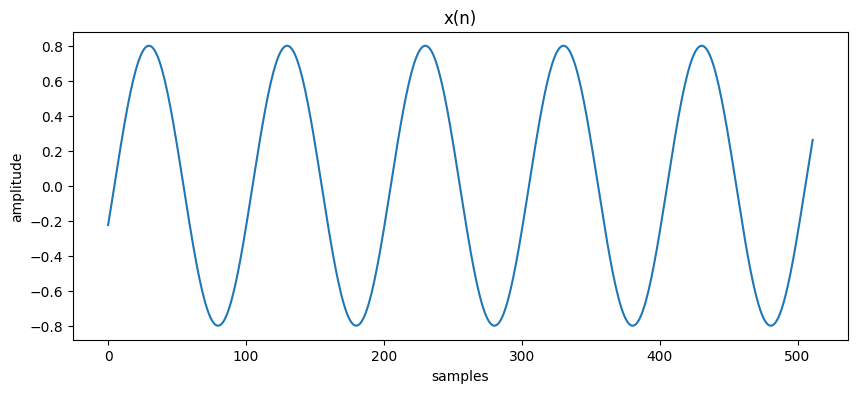

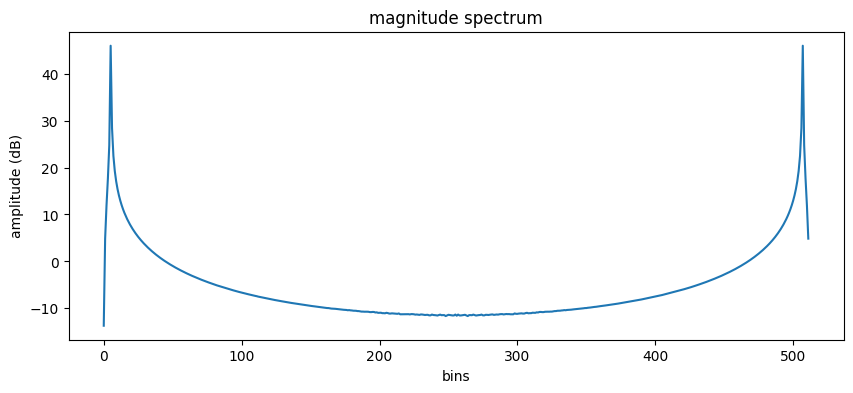

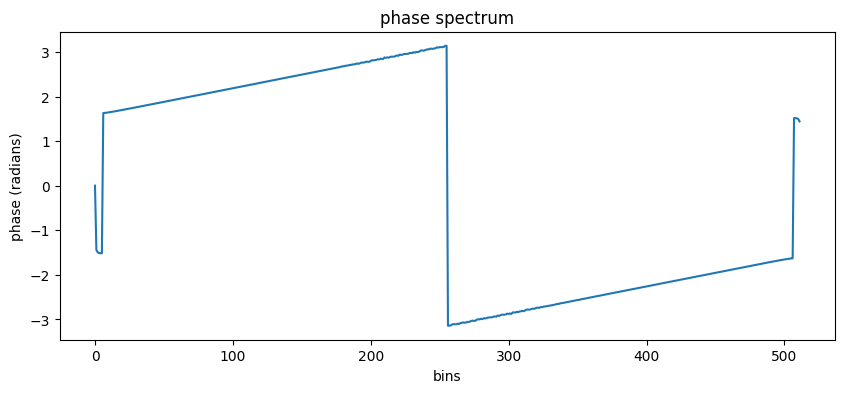

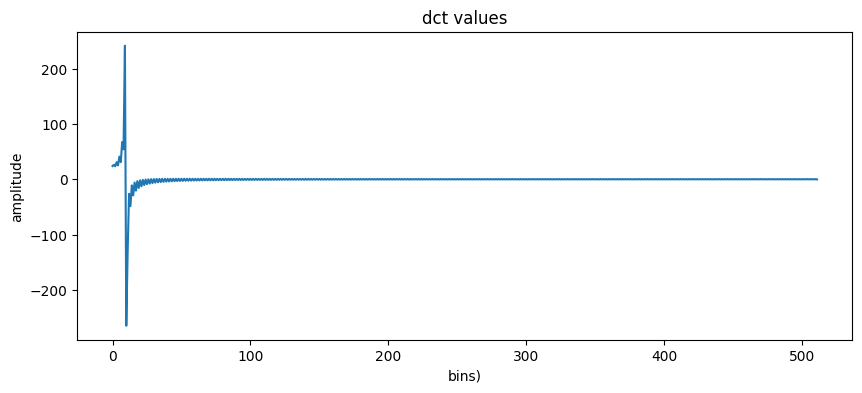

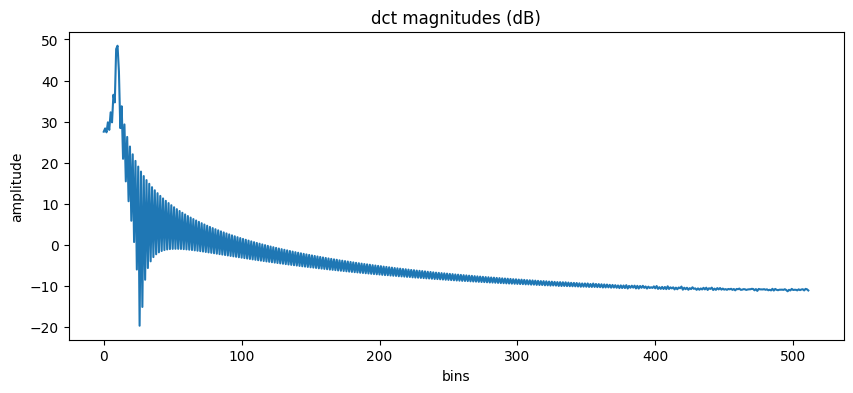

In [4]:
# perform dft and dct

N = 512
xf = x[2000:2000+N]

plt.figure(1, figsize=(10, 4))
plt.plot(xf)
plt.xlabel('samples')
plt.ylabel('amplitude')
plt.title('x(n)')
plt.show()

X_dft = fft(xf)
plt.figure(1, figsize=(10, 4))
plt.plot(20*np.log10(np.abs(X_dft)))
plt.xlabel('bins')
plt.ylabel('amplitude (dB)')
plt.title('magnitude spectrum')
plt.show()

X_dft = fft(xf)
plt.figure(1, figsize=(10, 4))
plt.plot(np.angle(X_dft))
plt.xlabel('bins')
plt.ylabel('phase (radians)')
plt.title('phase spectrum')
plt.show()

X_dct = dct(xf, type=4)
plt.figure(0, figsize=(10, 4))
plt.plot(X_dct)
plt.xlabel('bins)')
plt.ylabel('amplitude')
plt.title('dct values')
plt.show()

plt.figure(0, figsize=(10, 4))
plt.plot(20*np.log10(np.abs(X_dct)))
plt.xlabel('bins')
plt.ylabel('amplitude')
plt.title('dct magnitudes (dB)')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


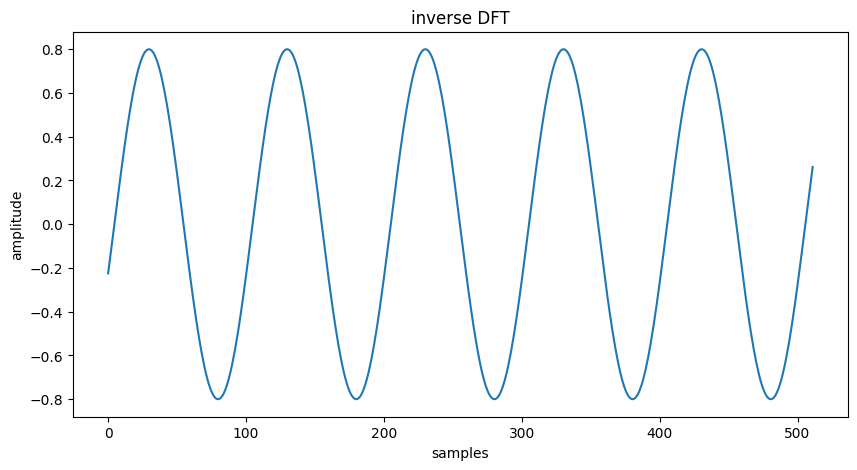

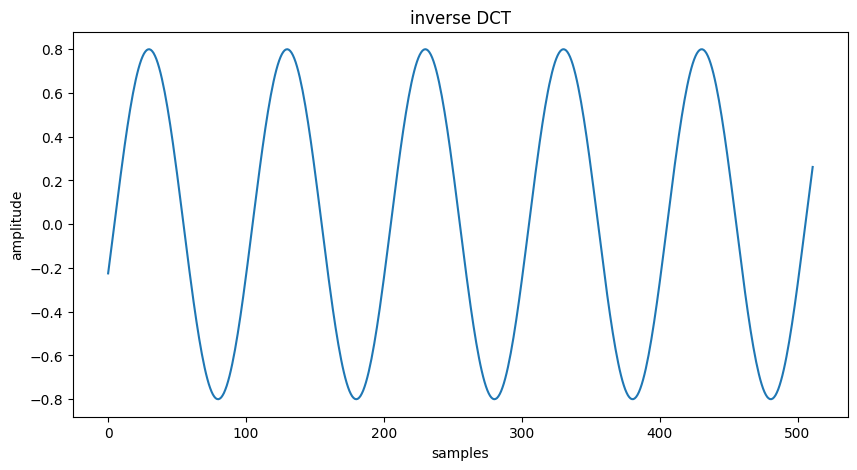

In [5]:
# perform inverse_dft and inverse_dct

y_idft = ifft(X_dft)
plt.figure(1, figsize=(10, 5))
plt.plot(y_idft)
plt.xlabel('samples')
plt.ylabel('amplitude')
plt.title('inverse DFT')
plt.show()

y_idct = idct(X_dct/(N*2), type=4)
plt.figure(1, figsize=(10, 5))
plt.plot(y_idct)
plt.xlabel('samples')
plt.ylabel('amplitude')
plt.title('inverse DCT')
plt.show()